## Predicting heart disease using machine learning

This notebook look into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

* We are going to take the following approach :
1. Problem Definition 
2. Data
3. Evaluation 
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition 

In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they are heart disease?

## 2. Data
The original data came from the cleavland data from UCI machine learning repository.- https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version available on Kaggle - https://www.kaggle.com/code/mrinmoyborah/knn-algorithm-uci-heart-dataset

## 3. Evaluation

> if we can reach 95% accuracy at predicting whether or not patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about of the features in your data. 

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
* can range from mild symptoms to severe problems
* signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
* Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* looks at stress of heart during excercise
* unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
* thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis and manipulation

In [32]:
 # Import all the tools we need
# Regular EDA (Exploratory data analysis) & plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the workbook

%matplotlib inline 



# Models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Model evaluations :
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv("heart-disease.csv")
df
df.shape # (rows & columns)

(303, 14)

# Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you are working with.
1. what question(s) are you trying to solve ?
2. What kind of data we have and how do we treat different types ?
3. What missing with data and how do you deal with it ?
4. Where are the outliers and why do we care about them?
5. How can you add, change or remove features to get more out of your data ?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
# Let's find out what are the counts of each class in dependent variables :
df["target"].value_counts()  

1    165
0    138
Name: target, dtype: int64

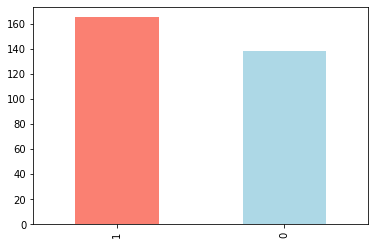

In [14]:
df["target"].value_counts().plot(kind = );

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Are there any missing values:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart disease frequency according to sex

In [5]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [6]:
# Compare target column with sex column:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


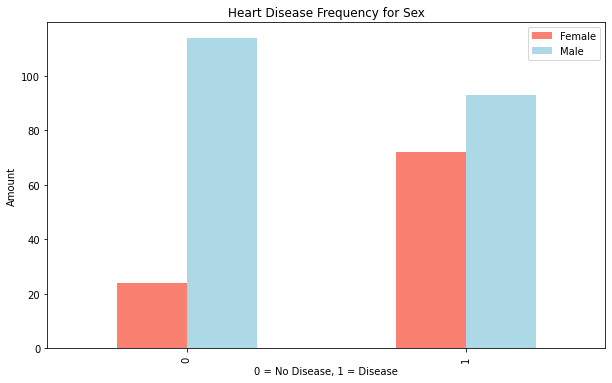

In [10]:
# Create a plot for crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color = ["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);

## Age vs. Max Heart Rate for Heart Disease

In [8]:
df.head()
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

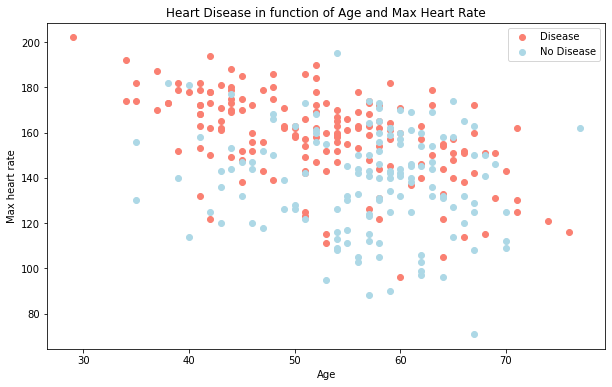

In [15]:
# Create another figure 
plt.figure(figsize = (10,6))

# Scatter with positive examples 
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

# Scatter with negative examples 
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No Disease"]);

In [9]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

<AxesSubplot:ylabel='Frequency'>

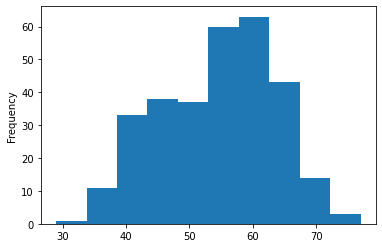

In [16]:
#Check the distribution of age column with histogram 
df.age.plot.hist()

# Heart Disease Frequency per chest pain
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease


In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


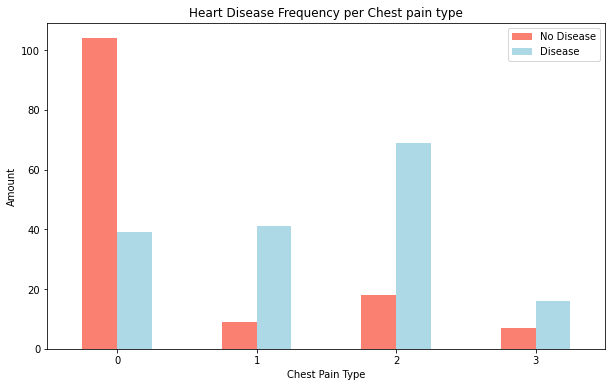

In [18]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize = (10,6),
                                  color = ["salmon", "lightblue"])
# Add some communication 
plt.title("Heart Disease Frequency per Chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);


What can we infer from this?

Remember from our data dictionary what the different levels of chest pain are.

cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

Wait...?

What does atypical agina even mean?

At this point, it's important to remember, if your data dictionary doesn't supply you enough information, you may want to do further research on your values. This research may come in the form of asking a subject matter expert (such as a cardiologist or the person who gave you the data) or Googling to find out more.

According to PubMed, it seems even some medical professionals are confused by the term.

Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.

Although not conclusive, this graph above is a hint at the confusion of defintions being represented in data.

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using df.corr() which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

In [8]:
# Make a correlation matrix:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

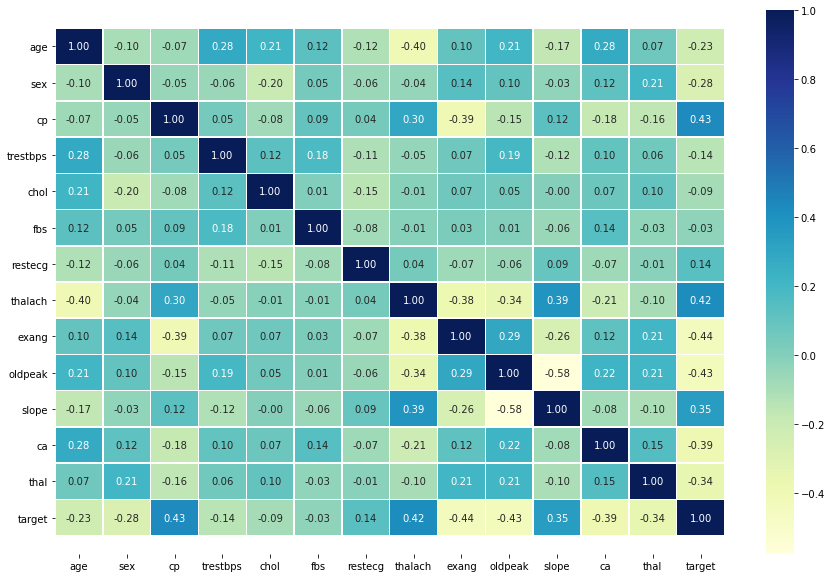

In [10]:
# Let's make our correction matrix a little prettier:
corr_marix = df.corr()
plt.figure(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
           annot = True,
            linewidths = 0.5,
           fmt = ".2f",
           cmap = "YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5) 

Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

## Enough EDA, let's model
Remember, we do exploratory data analysis (EDA) to start building an intuitition of the dataset.

What have we learned so far? Aside from our basline estimate using sex, the rest of the data seems to be pretty distributed.

So what we'll do next is model driven EDA, meaning, we'll use machine learning models to drive our next questions.

A few extra things to remember:

Not every EDA will look the same, what we've seen here is an example of what you could do for structured, tabular dataset.
You don't necessarily have to do the same plots as we've done here, there are many more ways to visualize data, I encourage you to look at more.
We want to quickly find:
Distributions (df.column.hist())
Missing values (df.info())
Outliers
Let's build some models.



## 5. Modeling
We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

Remember our problem?

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

 ## 5. Modelling

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Split data into X & Y :

X = df.drop('target', axis = 1)
y = df['target']

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
# Split data into train & test set :
np.random.seed(42)

# Split data into train & test set:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, test_size = 0.2)


In [7]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [8]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [5]:
y_train, len(y_test)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 61)

Now we have got our data split into training & test sets , it's time to 
build a Machine Learning Model

We would train it (finding the patterns) on the training set

And we will use the patterns from train set to test set

we are going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [5]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [6]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

# Model Comparision

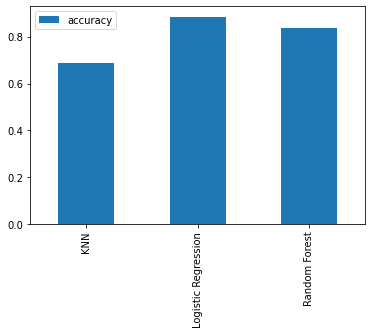

In [7]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model and we know a model's first predictions aren't always that we should 
based our next steps off .
what should do ?

Let's look at the following :
* Hyperparameter Tuning 
* Feature Importance 
* Confusion Matrix
* Cross Validation 
* Precision
* Recall
* F1-Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)


## Hyperparameter Tuning by hand

In [8]:
# Let's Tune KNN
train_score = []
test_score = []

# Create a list of different values for n-neighbours
neighbors = range(1,21)

# set up knn instances:

knn = KNeighborsClassifier()

# Loop through different neighbours:

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit the algorithm 
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    
    test_score.append(knn.score(X_test, y_test))


In [10]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [11]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum knn score on the test data: 75.41%


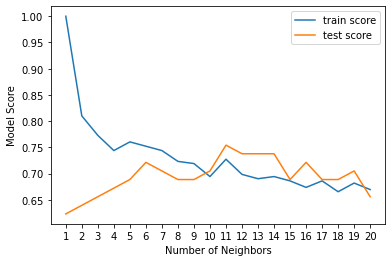

In [10]:
plt.plot(neighbors, train_score, label = "train score")
plt.plot(neighbors, test_score, label = "test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum knn score on the test data: {max(test_score)*100:.2f}%")

## Hyperparameter with Randomized Search CV 

We're going to tune :
* Logistic Regression ()
* RandomForestClassifier()

....using RandinizedSearchCV

In [9]:
# Create a hyperparameter grid for Logistic Regression :
log_req_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier:
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)} 

In [11]:
np.arange(10,1000,50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

In [39]:
rf_grid

{'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
        660, 710, 760, 810, 860, 910, 960]),
 'max_depth': [None, 3, 5, 10],
 'min_sample_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'min_sample_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [33]:
# just checing :
# clf = RandomForestClassifier(rf_grid)
np.random.seed(62)
x = np.random.randint(1,9, size= 4)

print(x)


[3 1 2 2]


Now we've got hyperparameters grids setup for each of our models, let's tune them using 
RandomizedSearchCV...

In [10]:
# setup randomized hyperparameters search for Logistic Regression :
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_req_grid,
                               cv=5,
                               n_iter = 20,
                               verbose = True)
# Now fit hyperparameter search model for Logistic Regression :
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [15]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [11]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we have tuned logistic regression, let's do the same for RandomForestClassifier

In [53]:
# Set up Random seed
np.random.seed(42)

# setup hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit Random hyperparameter search model for RandomForestClassifier :
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   59.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [54]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [55]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter with GridSearchCV

Since our Logistic Regression model provides the best score so far , we will try and improve 
them again using GridSearchCV 

In [11]:
# Different hyperparameter for Logistic Regression Model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}
# set-up grid hyperparameter for Logistic Regression model :

gs_log_reg = GridSearchCV(LogisticRegression(),
             param_grid = log_reg_grid,
             cv=5,
             verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [14]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [15]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [16]:
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

## Evaluating our tune machine leaning models , beyond accuracy:

* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

and it would be great if cross-validation was used where possible

* To make comparision and evaluate our trained model , first we need to make predictions 

In [14]:
# Make predcitions with tuned model:
y_preds = gs_log_reg.predict(X_test)

In [15]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [19]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

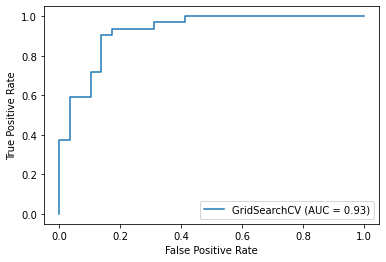

In [16]:
# Plot ROC(Receiver Operating Chracteristic curve) curve and calculate 
# and calculate AUC (Area Under ROC curve) metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [21]:
# Confusion Matrix :
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


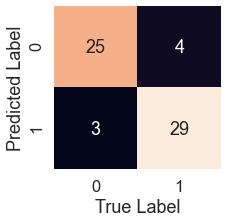

In [17]:
sns.set(font_scale= 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot= True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    #bottom,top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test,y_preds)
    

Now we've got ROC curve , an AUC metric and a confusion matrix, let's get a classification report as well as cross validation precision, recall and f1 score

In [18]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



 ### Calculating evaluation metrics using cross-validation
    We are going to calculate accuracy, precision , recall and f1-score of our model using cross validation and to do so we will be using cross_val_score().
    

In [19]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [12]:
# Create a new classifier with best params :
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [13]:
# Calculate cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,
                        cv=5,
                        scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [28]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [30]:
# Calculate cross-validated precision
cv_precision = cross_val_score(clf,
                              X,y,
                              cv=5,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [31]:
# Calculate crss-validated Recall
cv_recall = cross_val_score(clf,
                           X,y,
                           cv=5,
                           scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [33]:
# Calculate cross-validated f1-score
cv_f1 = cross_val_score(clf,
                           X,y,
                           cv=5,
                           scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<AxesSubplot:title={'center':'Cross-validated classification metric'}>

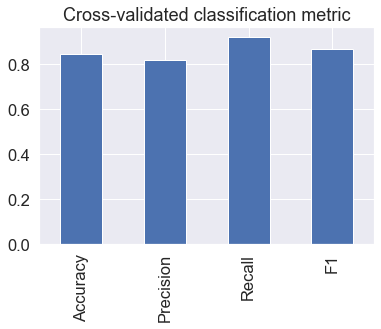

In [37]:
# visualize our cross validated matrix
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision": cv_precision,
                          "Recall":cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metric",
                     legend=False)

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
input=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre2=gs_log_reg.predict(input_reshaped)
if(pre2==1): 
  print("The patient seems to be have heart disease :(")
else:
  print("The patient seems to be Normal:")

The patient seems to be have heart disease :(


### Feature Importance
Feature importance is another as asking "which features contributed most to the outcome of the model and how did they contribute"
Finding feature importance is different from each machine learning model

* One way to find feature importance is to search for (MODEL NAME) feature importance

* Let's find the fewture importance for our Logistic Regression Model

In [21]:
# Find the instance of Logistic Regression 

clf = LogisticRegression(C= 0.23357214690901212,
                        solver = "liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [24]:
df.head()
# how each of these independent variables X_train dataset 
# the coefficient  contribute to target labels

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Check coef_ (coefficient) - how 
clf.coef_

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490194,  0.02472938, -0.63120405, -0.57590939,
         0.47095134, -0.65165349, -0.69984206]])

In [36]:
# Our Model driven Explolatory Data Analysis
# Match coef's to feature to columns - showing +ve or -ve correclation - 
# how it is  useful predicting the target variable
feature_dict = dict(zip(df.columns,list(clf.coef_[0])) )
feature_dict

{'age': 0.003699220218693,
 'sex': -0.9042408909021112,
 'cp': 0.6747282639169492,
 'trestbps': -0.01161340193177967,
 'chol': -0.001703644306964925,
 'fbs': 0.047876883381437196,
 'restecg': 0.33490194499930287,
 'thalach': 0.024729383642503815,
 'exang': -0.6312040482089574,
 'oldpeak': -0.5759093926828687,
 'slope': 0.470951337854335,
 'ca': -0.651653485595126,
 'thal': -0.6998420593767237}

<AxesSubplot:title={'center':'Feature Importance'}>

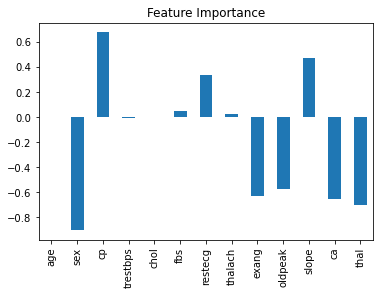

In [29]:
# Visualize feature importance 
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend = False)

In [30]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [35]:
72/3

24.0

In [5]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experiment

In [33]:
# Just Experimenting SVM model 

clf = SVC(C=12,kernel='linear')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
score = accuracy_score(y_test,predicted)
score                                                                                                                                               

0.8852459016393442

* Could you collect more data ?
* Could you try a better model? like CatBoost or XGBoost
* Could you inprove the current models (beyond what we have done so far)
* If model good enough how would you export it and share with others

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        32

    accuracy                           0.98        61
   macro avg       0.98      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61

Testing Accuracy for Decision Tree: 0.9836065573770492
Testing Sensitivity for Decision Tree: 0.9666666666666667
Testing Specificity for Decision Tree: 1.0
Testing Precision for Decision Tree: 1.0


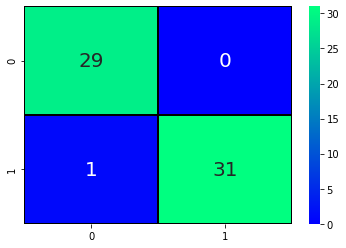

In [34]:
tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))